<font size="10">NN on Alzheimers Data</font>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.utils import np_utils

data = pd.read_csv("Alzheimer's.csv")

#categorical conversion 
#Converted the group to dummy variables
data.loc[data.Group=='Nondemented', 'Group'] = 0
data.loc[data.Group=='Demented', 'Group'] = 1
data.loc[data.Group=='Converted', 'Group'] = 2

#Converted the M/F to dummy variables
data.loc[data.Sex=='M', 'Sex'] = 0
data.loc[data.Sex=='F', 'Sex'] = 1


data

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,Mini Mental State,Clinical Dementia Rating,Estimated total Intracranial Volume,Normalize Whole Brain Volume,Atlas Scaling Factor
0,OAS2_0001,OAS2_0001_MR1,0,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,0,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,0,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,0,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,0,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,0,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,1,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,1,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


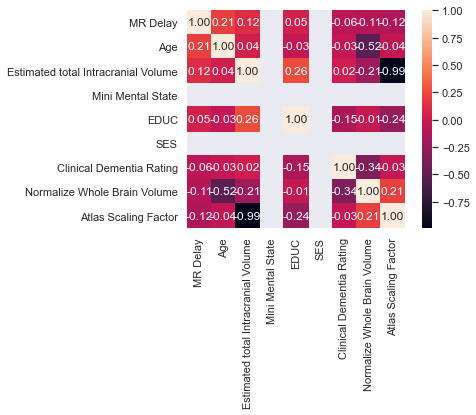

In [2]:
#Attempting PCA on data
#Hand is completely useless as it is identical for all samples
data_drop = data.drop(['Hand','Visit','Subject ID','MRI ID'], axis = 1) #axis = 1 means to drop column not row

#get rid of row 360 and 359 bc they are missing alot of data (both SES and MMS)
data_drop = data_drop.drop([360, 359])


#delete all data points that dont have SES in them (this is where they have NaN)
data_drop = data_drop.dropna()


from sklearn.model_selection import cross_val_score
correlation = data_drop.corr(method='pearson')
#we will us the top 10 here because the plot becomes unreadable at 20 predictors
columns = correlation.nlargest(10, 'MR Delay').index

import seaborn as sns
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)



#dementia status is what we want to predict - change this to single target 
group = data_drop[['Group']] 








In [3]:
data_drop = data_drop.drop(['Group'], axis = 1) #axis = 1 means to drop column not row

In [5]:
#get a list of columns in pandas object 
names_of_data = data_drop.columns.tolist()

#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(data_drop, group, test_size=0.2, shuffle = False)

#split train into validate and train. Given that the team did not all use NN
#we used different validation data, hence shuffle is on. 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle = True)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


#PCA was run to see what features contributed the most variance
# #running the actual PCA
# from sklearn.decomposition import PCA

# pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)


y_train = y_train.astype('int').to_numpy().ravel()
y_test = y_test.astype('int').to_numpy().ravel()
y_val = y_val.astype('int').to_numpy().ravel()

y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_val = np_utils.to_categorical(y_val, 3)




In [6]:
#lets use a neural network for this example
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np



In [7]:
from keras.layers import Activation, Dense
from keras.models import Sequential 

#Building the Model
model = Sequential()
model.add(Dense(5, input_dim=10))#5
model.add(Activation('relu'))
model.add(Dense(5, input_dim=5))#5
model.add(Activation('relu'))
model.add(Dense(3, input_dim=5))#5
model.add(Activation('softmax'))


from tensorflow import keras
#Early Stopping 
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 103
Trainable params: 103
Non-trainable params: 0
__________________________________________________________

In [8]:
epoch = 300
training = model.fit(X_train, y_train, batch_size=150, epochs=epoch,
                    verbose=1, validation_data=(X_val,y_val), callbacks = [es])



Epoch 1/300
2/2 [==============================] - 1s 636ms/step - loss: 1.1414 - accuracy: 0.3928 - val_loss: 1.1028 - val_accuracy: 0.4138
Epoch 2/300
2/2 [==============================] - 0s 39ms/step - loss: 1.1362 - accuracy: 0.3988 - val_loss: 1.0966 - val_accuracy: 0.4138
Epoch 3/300
2/2 [==============================] - 0s 39ms/step - loss: 1.1199 - accuracy: 0.4170 - val_loss: 1.0904 - val_accuracy: 0.4138
Epoch 4/300
2/2 [==============================] - 0s 36ms/step - loss: 1.1206 - accuracy: 0.3869 - val_loss: 1.0844 - val_accuracy: 0.4138
Epoch 5/300
2/2 [==============================] - 0s 36ms/step - loss: 1.1165 - accuracy: 0.4186 - val_loss: 1.0784 - val_accuracy: 0.4138
Epoch 6/300
2/2 [==============================] - 0s 36ms/step - loss: 1.1113 - accuracy: 0.4336 - val_loss: 1.0726 - val_accuracy: 0.4483
Epoch 7/300
2/2 [==============================] - 0s 37ms/step - loss: 1.1001 - accuracy: 0.4473 - val_loss: 1.0669 - val_accuracy: 0.4483
Epoch 8/300
2/2 [==

2/2 [==============================] - 0s 37ms/step - loss: 0.5053 - accuracy: 0.8477 - val_loss: 0.3820 - val_accuracy: 0.9310
Epoch 118/300
2/2 [==============================] - 0s 37ms/step - loss: 0.4805 - accuracy: 0.8637 - val_loss: 0.3779 - val_accuracy: 0.9310
Epoch 119/300
2/2 [==============================] - 0s 40ms/step - loss: 0.4759 - accuracy: 0.8637 - val_loss: 0.3740 - val_accuracy: 0.9310
Epoch 120/300
2/2 [==============================] - 0s 37ms/step - loss: 0.4849 - accuracy: 0.8601 - val_loss: 0.3702 - val_accuracy: 0.9310
Epoch 121/300
2/2 [==============================] - 0s 39ms/step - loss: 0.4648 - accuracy: 0.8778 - val_loss: 0.3665 - val_accuracy: 0.9310
Epoch 122/300
2/2 [==============================] - 0s 37ms/step - loss: 0.4715 - accuracy: 0.8689 - val_loss: 0.3629 - val_accuracy: 0.9310
Epoch 123/300
2/2 [==============================] - 0s 124ms/step - loss: 0.4686 - accuracy: 0.8667 - val_loss: 0.3595 - val_accuracy: 0.9310
Epoch 124/300
2/2 [

Epoch 175/300
2/2 [==============================] - 0s 31ms/step - loss: 0.3334 - accuracy: 0.8853 - val_loss: 0.2516 - val_accuracy: 0.9310
Epoch 176/300
2/2 [==============================] - 0s 32ms/step - loss: 0.3509 - accuracy: 0.8742 - val_loss: 0.2506 - val_accuracy: 0.9310
Epoch 177/300
2/2 [==============================] - 0s 37ms/step - loss: 0.3660 - accuracy: 0.8697 - val_loss: 0.2497 - val_accuracy: 0.9310
Epoch 178/300
2/2 [==============================] - 0s 38ms/step - loss: 0.3467 - accuracy: 0.8764 - val_loss: 0.2487 - val_accuracy: 0.9310
Epoch 179/300
2/2 [==============================] - 0s 34ms/step - loss: 0.3348 - accuracy: 0.8831 - val_loss: 0.2478 - val_accuracy: 0.9310
Epoch 180/300
2/2 [==============================] - 0s 34ms/step - loss: 0.3383 - accuracy: 0.8809 - val_loss: 0.2469 - val_accuracy: 0.9310
Epoch 181/300
2/2 [==============================] - 0s 35ms/step - loss: 0.3226 - accuracy: 0.8853 - val_loss: 0.2460 - val_accuracy: 0.9310
Epoch 

In [9]:
#Evaluating the model using the testing data
performance = model.evaluate(X_test, y_test, verbose=0)

print("test score", performance[0]) 
print("test accuracy", performance[1])

test score 0.382745623588562
test accuracy 0.8873239159584045


In [ ]:
#Performance was very similar to that of the validation accuracy 

<IPython.core.display.Javascript object>


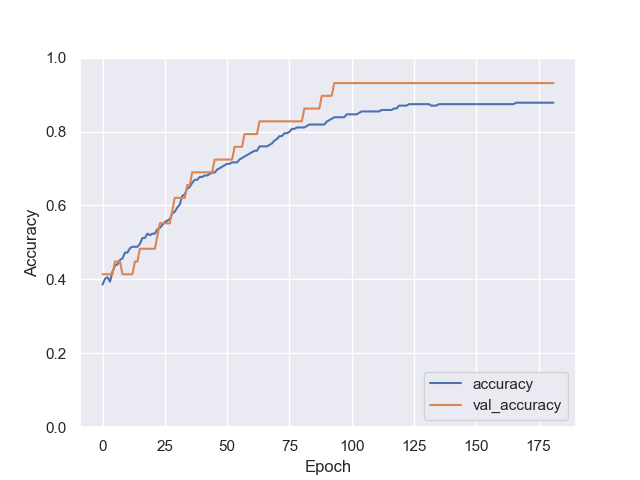

In [12]:
plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')

In [ ]:
#Jumps/sharp fluctuations in the validation accuracy could have been a result of too large of a learning rate